# Image Classification project

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import models,layers
from tensorflow import keras
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
path="fashion_mnist_dataset_train.npy"
f = np.load(path, allow_pickle=True)
fashion=f.item()
fashion_data=fashion['features']
fashion_lbl=fashion['target']
print("Shape and dimension of fashion_data :",fashion_data.shape,fashion_data.ndim)
print("Shape and dimension of fashion_datalbl :",fashion_lbl.shape,fashion_lbl.ndim)

Shape and dimension of fashion_data : (60000, 28, 28) 3
Shape and dimension of fashion_datalbl : (60000,) 1


In [3]:
# fashion_data=fashion_data.reshape((60000,28,28,1))
# print(fashion_data.shape)

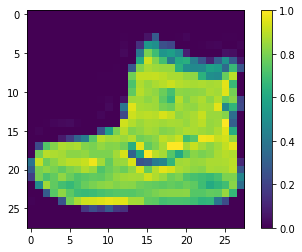

In [4]:
# Showing image
plt.figure()
plt.imshow(fashion_data[0])
plt.colorbar()
plt.show()

Here I can see that data is already normalized because values of image is between 0 and 1. 

In [5]:
train_data=fashion_data[:54000]
# val_data=fashion_data[50000:56000]
test_data=fashion_data[54000:]
train_lbl=fashion_lbl[:54000]
#val_lbl=fashion_lbl[50000:56000]
test_lbl=fashion_lbl[54000:]
print(train_data.shape,train_lbl.shape)
# print(val_data.shape,val_lbl.shape)
print(test_data.shape,test_lbl.shape)

(54000, 28, 28) (54000,)
(6000, 28, 28) (6000,)


In [6]:
# Reshaping
train_data=train_data.reshape((54000,28,28,1))
# val_data=val_data.reshape((6000,28,28,1))
test_data=test_data.reshape((6000,28,28,1))
print(train_data.shape)
# print(val_data.shape)
print(test_data.shape)

(54000, 28, 28, 1)
(6000, 28, 28, 1)


## Convolution Neural Network
### Training, Predicting, and Evaluating the model

In [7]:
cnn=models.Sequential()
cnn.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
cnn.add(layers.MaxPooling2D((2,2)))
cnn.add(layers.Conv2D(32,(3,3),activation='relu'))
cnn.add(layers.MaxPooling2D((2,2)))
cnn.add(layers.Conv2D(32,(3,3),activation='relu'))

cnn.add(layers.Flatten())
cnn.add(layers.Dense(64,activation='relu'))
cnn.add(layers.Dense(64,activation='relu'))
cnn.add(layers.Dense(6,activation='softmax'))
cnn.summary()
cnn.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
fashion_data=fashion_data.reshape((60000,28,28,1))
store=cnn.fit(train_data,train_lbl,epochs=50,validation_split=0.2)
# train_loss,train_acc=cnn.evaluate(train_data,train_lbl)
# print(train_acc)
test_loss,test_acc=cnn.evaluate(test_data,test_lbl)
print(test_acc)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
flatten (Flatten)            (None, 288)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                1

1350/1350 [==============================] - 26s 19ms/step - loss: 0.0671 - accuracy: 0.9734 - val_loss: 0.4494 - val_accuracy: 0.9008
Epoch 47/50
1350/1350 [==============================] - 25s 18ms/step - loss: 0.0655 - accuracy: 0.9746 - val_loss: 0.4543 - val_accuracy: 0.8958
Epoch 48/50
1350/1350 [==============================] - 28s 21ms/step - loss: 0.0654 - accuracy: 0.9741 - val_loss: 0.4901 - val_accuracy: 0.8893
Epoch 49/50
1350/1350 [==============================] - 27s 20ms/step - loss: 0.0690 - accuracy: 0.9727 - val_loss: 0.5075 - val_accuracy: 0.8925
Epoch 50/50
188/188 [==============================] - 1s 5ms/step - loss: 0.4845 - accuracy: 0.8997
0.8996666669845581


In [8]:
#Test accuracy and Loss
test_loss,test_acc=cnn.evaluate(test_data,test_lbl)
print('Accuracy of Test:',test_acc)
print('Loss of Test:',test_loss)

188/188 [==============================] - 1s 4ms/step - loss: 0.4845 - accuracy: 0.8997
Accuracy of Test: 0.8996666669845581
Loss of Test: 0.4845455586910248


In [9]:
# Early Fitting
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self,epoch,logs):
        if epoch%100==0: print(' ')
        print('.',end='')
EPOCHS=1000
cnn.metrics_names
# history=cnn.fit(train_data,train_lbl,epochs=EPOCHS, validation_split=0.2,verbose=0,callbacks=[PrintDot()])

['loss', 'accuracy']

In [10]:
hist=pd.DataFrame(store.history)
hist['epoch']=store.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
45,0.072565,0.971667,0.449366,0.900833,45
46,0.072812,0.971898,0.454290,0.895833,46
47,0.069434,0.972963,0.490053,0.889259,47
48,0.072118,0.971250,0.507479,0.892500,48
49,0.066540,0.974722,0.498389,0.897130,49


#### Runtime Performance after 50 epoch:
* Validation Set Accuracy: 0.89
* Validation Set Loss Error: 0.43
* Training Set Accuracy: 0.96
* Training Loss Error: 0.08
* Test Data Accuracy:0.89
* Test Data Loss Error: 0.56


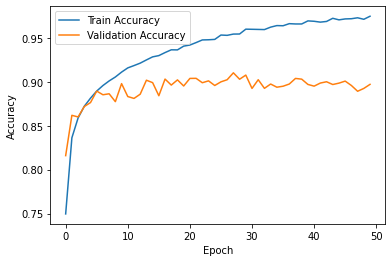

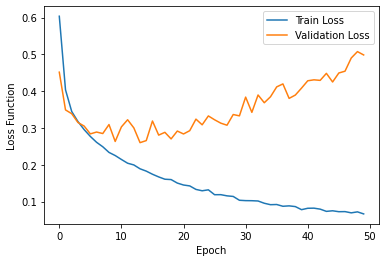

In [11]:
def plot_history(store):
  hist=pd.DataFrame(store.history)
  hist['epoch']=store.epoch
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.plot(hist['epoch'],hist['accuracy'],label="Train Accuracy")
  plt.plot(hist['epoch'],hist['val_accuracy'],label="Validation Accuracy")
  plt.legend()
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Loss Function')
  plt.plot(hist['epoch'],hist['loss'],label="Train Loss")
  plt.plot(hist['epoch'],hist['val_loss'],label="Validation Loss")
  plt.legend()
  plt.show()

plot_history(store)

In above 2 plots I can clearly see that between 10 to 20 epoch value the validation loss error is minimum and after that loss error started increasing.

So now I will apply Early Stopping Regularization to stop the training once the validation loss started increasing instead of decreasing. This will avoid the overfitting the network. 

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 11, 11, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 5, 5, 32)          0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 3, 3, 32)          9248      
_________________________________________________________________
flatten_1 (Flatten)          (None, 288)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 64)               

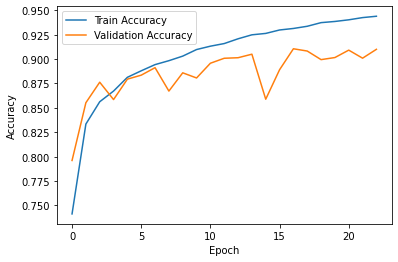

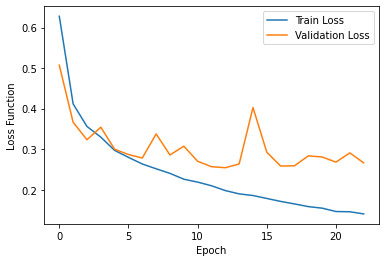

In [12]:
cnn1=models.Sequential()
cnn1.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
cnn1.add(layers.MaxPooling2D((2,2)))
cnn1.add(layers.Conv2D(32,(3,3),activation='relu'))
cnn1.add(layers.MaxPooling2D((2,2)))
cnn1.add(layers.Conv2D(32,(3,3),activation='relu'))

cnn1.add(layers.Flatten())
cnn1.add(layers.Dense(64,activation='relu'))
cnn1.add(layers.Dense(64,activation='relu'))
cnn1.add(layers.Dense(6,activation='softmax'))
cnn1.summary()
cnn1.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
fashion_data=fashion_data.reshape((60000,28,28,1))
store1=cnn1.fit(train_data,train_lbl,epochs=50,validation_split=0.2,callbacks = [keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)])
# train_loss,train_acc=cnn.evaluate(train_data,train_lbl)
# print(train_acc)
test_loss1,test_acc1=cnn1.evaluate(test_data,test_lbl)
print('Accuracy of Test Set:',test_acc1)
print('Loss of Test Set:',test_loss1)
# early_stop=keras.callbacks.EarlyStopping(monitor='val_loss',patience=10)
# store1=cnn.fit(train_data,train_lbl,epochs=100,validation_split=0.2,verbose=1,callbacks=[early_stop])
plot_history(store1)

After epoch 23 we stoped training the data. As futhur I said after 20 to 25 epoch, the loss is increasing. So It stopped training after that.

# After Applying Early Stopping 
We get better runtime performance in less number of epoch.

Runtime performance **before** Early Stopping Regularization:
* Number of Epochs: **50**
* Validation Set Accuracy: 0.89
* Validation Set Loss Error: 0.43
* Training Set Accuracy: 0.96
* Training Loss Error: 0.08
* Test Data Accuracy: **0.89**
* Test Data Loss Error: **0.56**

Runtime performance **after** Early Stopping Regularization:
* Number of Epochs: **23**
* Validation Set Accuracy: 0.90
* Validation Set Loss Error: 0.31
* Training Set Accuracy: 0.95
* Training Loss Error: 0.10
* Test Data Accuracy: **0.90**
* Test Data Loss Error: **0.33**

So I can clearly see that Early Stopping Regularization, helped the training data to avoid overfitting and imporoved Test set accuracy and reduced loss error from test set also.


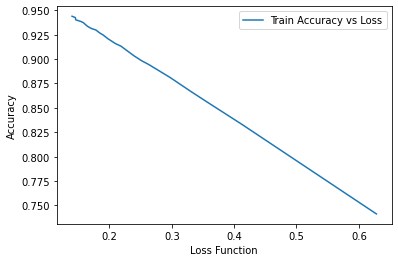

In [14]:
def plot_his2(store):
  hist=pd.DataFrame(store.history)
  hist['epoch']=store.epoch
  plt.figure()
  plt.xlabel('Loss Function')
  plt.ylabel('Accuracy')
  plt.plot(hist['loss'],hist['accuracy'],label="Train Accuracy vs Loss")
#   plt.plot(hist['val_loss'],hist['val_accuracy'],label="Validation Accuracy vs Loss")
  plt.legend()
  # plt.figure()
  # plt.xlabel('Epoch')
  # plt.ylabel('Loss Function')
  # plt.plot(hist['epoch'],hist['loss'],label="Train Loss")
  # plt.plot(hist['epoch'],hist['val_loss'],label="Validation Loss")
  # plt.legend()
  plt.show()

plot_his2(store1)

From this plot I can say that when if loss decreases then accuracy increases. We can see this more clearly into Training dataset accuracy vs Loss line.

For the more beneficial result, we can try Resnet neural network. 

References: https://nptel.ac.in/courses/106/106/106106213/